In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import log_loss

In [2]:
train_df = pd.read_csv('../data/TCGA-SKCM_train_unresampled.csv',index_col=0)
train_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,...,icd_10_code_C77.3,icd_10_code_C77.4,icd_10_code_C77.5,icd_10_code_C77.9,race_not reported,race_white,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,vital_status_Dead
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-EE-A3AE,1,82.0,172.5,26.793641,52.0,198.2695,7260.4981,97.9081,0.2846,321.3320,...,0,1,0,0,0,1,0,1,0,0
TCGA-EE-A3AB,1,86.5,172.5,29.308234,30.0,279.7274,143990.5130,31.9909,0.0000,219866.3552,...,1,0,0,0,0,1,1,1,0,0
TCGA-ER-A2NH,1,64.0,174.5,20.702113,49.0,132.5213,49821.7181,107.4468,0.0000,112313.8298,...,1,0,0,0,0,1,1,1,0,0
TCGA-GN-A4U9,1,104.0,176.0,33.574380,71.0,185.3061,3267.8053,37.2580,0.8373,3.3490,...,0,1,0,0,0,1,1,1,0,1
TCGA-ER-A19A,1,64.0,167.5,22.767946,79.0,137.2926,53361.5831,113.3985,0.5545,105.6353,...,0,0,0,0,0,1,1,1,0,0


In [3]:
test_df = pd.read_csv('../data/TCGA-SKCM_test_unresampled.csv',index_col=0)
test_df.head()

,sample_type,weight,height,bmi,age_at_index,A1BG,A2M,NAT1,NAT2,RP11-986E7.7,...,icd_10_code_C77.3,icd_10_code_C77.4,icd_10_code_C77.5,icd_10_code_C77.9,race_not reported,race_white,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,vital_status_Dead
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-D3-A8GS,1,111.0,181.0,33.881750,52.0,546.5837,93090.1867,36.2796,0.0,330.7843,...,0,0,0,0,0,1,1,1,0,1
TCGA-EE-A2GS,1,84.5,170.0,27.917168,28.0,490.9347,17546.1929,38.8724,0.0,4970.6231,...,0,0,0,0,0,1,0,1,0,1
TCGA-D3-A2J7,1,93.0,175.0,30.367347,67.0,130.9387,18169.8586,252.1972,0.0,746.4017,...,0,0,0,1,0,1,1,1,0,1
TCGA-GN-A4U3,1,84.0,180.0,25.925926,30.0,261.4332,148931.6431,150.5854,0.0,872.8300,...,0,0,0,0,0,1,1,1,0,0
TCGA-XV-AAZW,0,74.0,170.0,25.605536,62.0,470.2573,4310.0451,89.8420,0.0,650.1129,...,0,0,0,0,0,1,0,1,0,1


In [4]:
train_df = train_df[[
       'sample_type',
       'ajcc_pathologic_stage_Stage 0', 'ajcc_pathologic_stage_Stage I',
       'ajcc_pathologic_stage_Stage IA', 'ajcc_pathologic_stage_Stage IB',
       'ajcc_pathologic_stage_Stage II',
       'ajcc_pathologic_stage_Stage IIA',
       'ajcc_pathologic_stage_Stage IIB',
       'ajcc_pathologic_stage_Stage IIC',
       'ajcc_pathologic_stage_Stage III',
       'ajcc_pathologic_stage_Stage IIIA',
       'ajcc_pathologic_stage_Stage IIIB',
       'ajcc_pathologic_stage_Stage IIIC',
       'ajcc_pathologic_stage_Stage IV', 
       'ajcc_pathologic_t_T1', 'ajcc_pathologic_t_T1a',
       'ajcc_pathologic_t_T1b', 'ajcc_pathologic_t_T2',
       'ajcc_pathologic_t_T2a', 'ajcc_pathologic_t_T2b',
       'ajcc_pathologic_t_T3', 'ajcc_pathologic_t_T3a',
       'ajcc_pathologic_t_T3b', 'ajcc_pathologic_t_T4',
       'ajcc_pathologic_t_T4a', 'ajcc_pathologic_t_T4b',
       'ajcc_pathologic_t_TX', 'ajcc_pathologic_t_Tis',
       'ajcc_pathologic_n_N1', 'ajcc_pathologic_n_N1a',
       'ajcc_pathologic_n_N1b', 'ajcc_pathologic_n_N2',
       'ajcc_pathologic_n_N2a', 'ajcc_pathologic_n_N2b',
       'ajcc_pathologic_n_N2c', 'ajcc_pathologic_n_N3',
       'ajcc_pathologic_n_NX', 'ajcc_pathologic_m_M1',
       'ajcc_pathologic_m_M1a', 'ajcc_pathologic_m_M1b',
       'ajcc_pathologic_m_M1c', 'icd_10_code_C18.9', 'icd_10_code_C22.0',
       'icd_10_code_C34.3', 'icd_10_code_C34.9', 'icd_10_code_C44.2',
       'icd_10_code_C44.3', 'icd_10_code_C44.31', 'icd_10_code_C44.4',
       'icd_10_code_C44.5', 'icd_10_code_C44.50', 'icd_10_code_C44.6',
       'icd_10_code_C44.601', 'icd_10_code_C44.7', 'icd_10_code_C44.701',
       'icd_10_code_C44.9', 'icd_10_code_C49.0', 'icd_10_code_C49.1',
       'icd_10_code_C49.2', 'icd_10_code_C49.20', 'icd_10_code_C49.3',
       'icd_10_code_C49.4', 'icd_10_code_C49.5', 'icd_10_code_C49.6',
       'icd_10_code_C49.9', 'icd_10_code_C51.9', 'icd_10_code_C71.1',
       'icd_10_code_C71.3', 'icd_10_code_C71.9', 'icd_10_code_C74.9',
       'icd_10_code_C76.1', 'icd_10_code_C76.2', 'icd_10_code_C76.3',
       'icd_10_code_C77.0', 'icd_10_code_C77.2', 'icd_10_code_C77.3',
       'icd_10_code_C77.4', 'icd_10_code_C77.5', 'icd_10_code_C77.9',
       'race_not reported',
       'race_white', 'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported', 'vital_status_Dead', 'weight', 'height','bmi','age_at_index'
]]
train_df.head()

,sample_type,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,...,race_not reported,race_white,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,vital_status_Dead,weight,height,bmi,age_at_index
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-EE-A3AE,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,82.0,172.5,26.793641,52.0
TCGA-EE-A3AB,1,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,86.5,172.5,29.308234,30.0
TCGA-ER-A2NH,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,64.0,174.5,20.702113,49.0
TCGA-GN-A4U9,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,104.0,176.0,33.574380,71.0
TCGA-ER-A19A,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,64.0,167.5,22.767946,79.0


In [5]:
test_df = test_df[[
       'sample_type',
       'ajcc_pathologic_stage_Stage 0', 'ajcc_pathologic_stage_Stage I',
       'ajcc_pathologic_stage_Stage IA', 'ajcc_pathologic_stage_Stage IB',
       'ajcc_pathologic_stage_Stage II',
       'ajcc_pathologic_stage_Stage IIA',
       'ajcc_pathologic_stage_Stage IIB',
       'ajcc_pathologic_stage_Stage IIC',
       'ajcc_pathologic_stage_Stage III',
       'ajcc_pathologic_stage_Stage IIIA',
       'ajcc_pathologic_stage_Stage IIIB',
       'ajcc_pathologic_stage_Stage IIIC',
       'ajcc_pathologic_stage_Stage IV', 
       'ajcc_pathologic_t_T1', 'ajcc_pathologic_t_T1a',
       'ajcc_pathologic_t_T1b', 'ajcc_pathologic_t_T2',
       'ajcc_pathologic_t_T2a', 'ajcc_pathologic_t_T2b',
       'ajcc_pathologic_t_T3', 'ajcc_pathologic_t_T3a',
       'ajcc_pathologic_t_T3b', 'ajcc_pathologic_t_T4',
       'ajcc_pathologic_t_T4a', 'ajcc_pathologic_t_T4b',
       'ajcc_pathologic_t_TX', 'ajcc_pathologic_t_Tis',
       'ajcc_pathologic_n_N1', 'ajcc_pathologic_n_N1a',
       'ajcc_pathologic_n_N1b', 'ajcc_pathologic_n_N2',
       'ajcc_pathologic_n_N2a', 'ajcc_pathologic_n_N2b',
       'ajcc_pathologic_n_N2c', 'ajcc_pathologic_n_N3',
       'ajcc_pathologic_n_NX', 'ajcc_pathologic_m_M1',
       'ajcc_pathologic_m_M1a', 'ajcc_pathologic_m_M1b',
       'ajcc_pathologic_m_M1c', 'icd_10_code_C18.9', 'icd_10_code_C22.0',
       'icd_10_code_C34.3', 'icd_10_code_C34.9', 'icd_10_code_C44.2',
       'icd_10_code_C44.3', 'icd_10_code_C44.31', 'icd_10_code_C44.4',
       'icd_10_code_C44.5', 'icd_10_code_C44.50', 'icd_10_code_C44.6',
       'icd_10_code_C44.601', 'icd_10_code_C44.7', 'icd_10_code_C44.701',
       'icd_10_code_C44.9', 'icd_10_code_C49.0', 'icd_10_code_C49.1',
       'icd_10_code_C49.2', 'icd_10_code_C49.20', 'icd_10_code_C49.3',
       'icd_10_code_C49.4', 'icd_10_code_C49.5', 'icd_10_code_C49.6',
       'icd_10_code_C49.9', 'icd_10_code_C51.9', 'icd_10_code_C71.1',
       'icd_10_code_C71.3', 'icd_10_code_C71.9', 'icd_10_code_C74.9',
       'icd_10_code_C76.1', 'icd_10_code_C76.2', 'icd_10_code_C76.3',
       'icd_10_code_C77.0', 'icd_10_code_C77.2', 'icd_10_code_C77.3',
       'icd_10_code_C77.4', 'icd_10_code_C77.5', 'icd_10_code_C77.9',
       'race_not reported',
       'race_white', 'gender_male', 'ethnicity_not hispanic or latino',
       'ethnicity_not reported', 'vital_status_Dead', 'weight', 'height','bmi','age_at_index'
]]
test_df.head()

,sample_type,ajcc_pathologic_stage_Stage 0,ajcc_pathologic_stage_Stage I,ajcc_pathologic_stage_Stage IA,ajcc_pathologic_stage_Stage IB,ajcc_pathologic_stage_Stage II,ajcc_pathologic_stage_Stage IIA,ajcc_pathologic_stage_Stage IIB,ajcc_pathologic_stage_Stage IIC,ajcc_pathologic_stage_Stage III,...,race_not reported,race_white,gender_male,ethnicity_not hispanic or latino,ethnicity_not reported,vital_status_Dead,weight,height,bmi,age_at_index
submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-D3-A8GS,1,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,1,111.0,181.0,33.881750,52.0
TCGA-EE-A2GS,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,84.5,170.0,27.917168,28.0
TCGA-D3-A2J7,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,1,93.0,175.0,30.367347,67.0
TCGA-GN-A4U3,1,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,84.0,180.0,25.925926,30.0
TCGA-XV-AAZW,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,74.0,170.0,25.605536,62.0


In [6]:
train_target = train_df[['sample_type']]
train_target.astype(float, 64)
train_target.head()

,sample_type
submitter_id,
TCGA-EE-A3AE,1
TCGA-EE-A3AB,1
TCGA-ER-A2NH,1
TCGA-GN-A4U9,1
TCGA-ER-A19A,1


In [7]:
test_target = test_df[['sample_type']]
test_target.astype(float, 64)
test_target.head()

,sample_type
submitter_id,
TCGA-D3-A8GS,1
TCGA-EE-A2GS,1
TCGA-D3-A2J7,1
TCGA-GN-A4U3,1
TCGA-XV-AAZW,0


In [8]:
train_df = train_df.drop(['sample_type'], 1)
test_df = test_df.drop(['sample_type'], 1)

## Classification between Primary Tumor and Metastatic (without PCA)

### Logistic Regression

In [9]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_feature_lr = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_lr.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_lr.best_score_)
print(grid_search_feature_lr.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
Best parameter (CV score=0.875):
{'logistic__C': 0.1, 'logistic__penalty': 'l1'}


LogisticRegression accuracy: 0.858


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

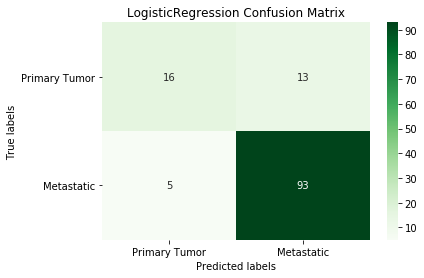

In [10]:
lr_model = grid_search_feature_lr.best_estimator_

lr_pred = grid_search_feature_lr.predict(test_df)

print('LogisticRegression accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

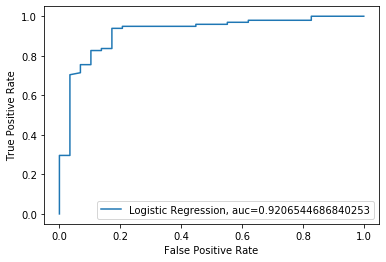

In [11]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [12]:
lr_model = grid_search_feature_lr.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.3226582236638251


### Support Vector Machines

In [13]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('SVM', SVC(probability=True))
])

parameters = {
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.00001, 10], 
    "SVM__kernel": ["linear","poly","sigmoid","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_feature_svm = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_svm.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_svm.best_score_)
print(grid_search_feature_svm.best_params_)

Fitting 2 folds for each of 288 candidates, totalling 576 fits
Best parameter (CV score=0.895):
{'SVM__C': 1, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.01, 'SVM__kernel': 'sigmoid'}


Support Vector Machines accuracy: 0.843


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

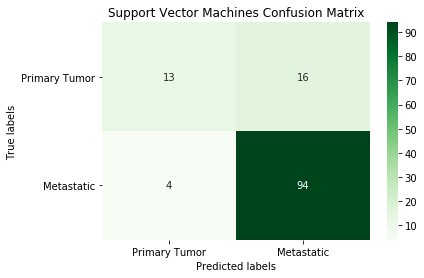

In [14]:
svm_model = grid_search_feature_svm.best_estimator_

svm_pred = grid_search_feature_svm.predict(test_df)

print('Support Vector Machines accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

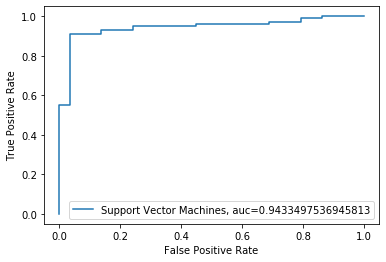

In [15]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [16]:
svm_model = grid_search_feature_svm.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.28624466118012826


### Random Forest 

In [17]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_feature_rf = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_feature_rf.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_feature_rf.best_score_)
print(grid_search_feature_rf.best_params_)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
Best parameter (CV score=0.875):
{'rf__bootstrap': True, 'rf__max_features': 0.6, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 30}


Random Forest accuracy: 0.843


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

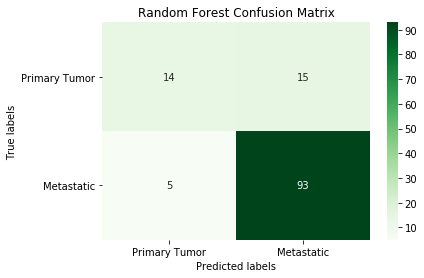

In [18]:
rf_model = grid_search_feature_rf.best_estimator_

rf_pred = grid_search_feature_rf.predict(test_df)

print('Random Forest accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

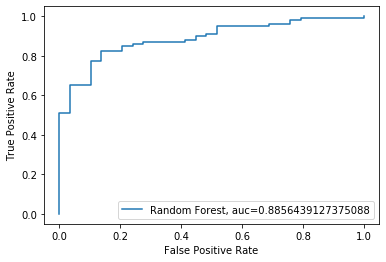

In [19]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [20]:
rf_model = grid_search_feature_rf.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.36397676688301245


## Classification between Primary Tumor and Metastatic (with PCA)

### Using Logistic Regression

In [21]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),
  ('logistic', LogisticRegression(
                  solver='liblinear', 
                  max_iter=10000, 
                  tol=0.001, 
                  fit_intercept=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'logistic__C': [1e-03, 1e-2, 1e-1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}

grid_search_lr_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_lr_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_lr_pca.best_score_)
print(grid_search_lr_pca.best_params_)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
Best parameter (CV score=0.895):
{'logistic__C': 1, 'logistic__penalty': 'l1', 'pca__n_components': 0.6}


In [22]:
grid_search_lr_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.6, svd_solver='full')),
                ('logistic',
                 LogisticRegression(C=1, max_iter=10000, penalty='l1',
                                    solver='liblinear', tol=0.001))])

LogisticRegression accuracy: 0.858


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

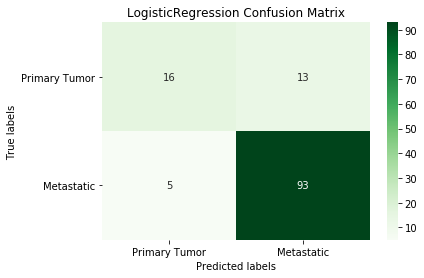

In [23]:
lr_model_pca = grid_search_lr_pca.best_estimator_

lr_pred = grid_search_lr_pca.predict(test_df)

print('LogisticRegression accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), lr_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), lr_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('LogisticRegression Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

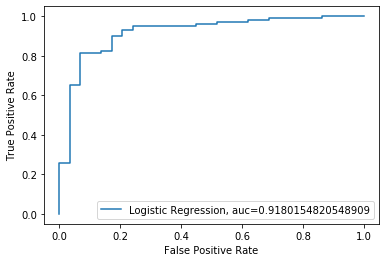

In [24]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  lr_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), lr_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [25]:
lr_model = grid_search_lr_pca.best_estimator_
lr_pred_proba = lr_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  lr_pred_proba)
print(log_loss_score)

0.32232481136346236


### Using Support Vector Machines

In [26]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('SVM', SVC(probability=True))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'SVM__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'SVM__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10], 
    "SVM__kernel": ["linear","poly","rbf"], 
    "SVM__decision_function_shape" : ["ovo", "ovr"]
}

grid_search_svm_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_svm_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_svm_pca.best_score_)
print(grid_search_svm_pca.best_params_)

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits
Best parameter (CV score=0.909):
{'SVM__C': 10, 'SVM__decision_function_shape': 'ovo', 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf', 'pca__n_components': 0.7}


In [27]:
grid_search_svm_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.7, svd_solver='full')),
                ('SVM',
                 SVC(C=10, decision_function_shape='ovo', gamma=0.001,
                     probability=True))])

Support Vector Machines accuracy: 0.827


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

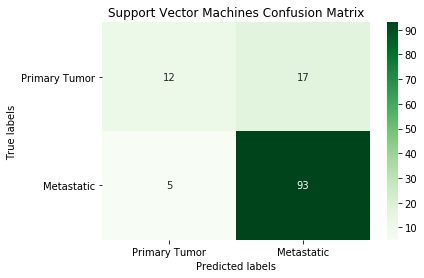

In [28]:
svm_model = grid_search_svm_pca.best_estimator_

svm_pred = grid_search_svm_pca.predict(test_df)

print('Support Vector Machines accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), svm_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), svm_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Support Vector Machines Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

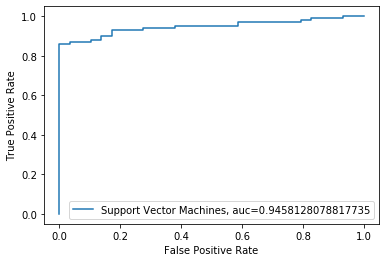

In [29]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  svm_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), svm_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machines, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [32]:
svm_model = grid_search_svm_pca.best_estimator_
svm_pred_proba = svm_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  svm_pred_proba)
print(log_loss_score)

0.3011186826723538


### Using Random Forest

In [33]:
pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('pca', PCA(svd_solver='full')),    
  ('rf', RandomForestClassifier(random_state=1))
])

parameters = {
    'pca__n_components': [0.6, 0.7, 0.75, 0.8, 0.9],    
    'rf__bootstrap': [True], 
    'rf__n_estimators': [30, 60, 70, 80, 90], 
    'rf__max_features': [0.6, 0.65, 0.7, 0.75, 0.8], 
    "rf__min_samples_leaf":  [6, 8, 10, 12, 14], 
    "rf__min_samples_split" : [2, 3, 5, 7]    
}

grid_search_rf_pca = GridSearchCV(pipe, parameters, n_jobs=4,cv=2, return_train_score=False, verbose=3, scoring='accuracy')
grid_search_rf_pca.fit(train_df, train_target.sample_type.astype('int'))

print("Best parameter (CV score=%0.3f):" % grid_search_rf_pca.best_score_)
print(grid_search_rf_pca.best_params_)

Fitting 2 folds for each of 2500 candidates, totalling 5000 fits
Best parameter (CV score=0.889):
{'pca__n_components': 0.6, 'rf__bootstrap': True, 'rf__max_features': 0.6, 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 2, 'rf__n_estimators': 30}


In [34]:
grid_search_rf_pca.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.6, svd_solver='full')),
                ('rf',
                 RandomForestClassifier(max_features=0.6, min_samples_leaf=6,
                                        n_estimators=30, random_state=1))])

Random Forest accuracy: 0.827


[Text(0, 0.5, 'Primary Tumor'), Text(0, 1.5, 'Metastatic')]

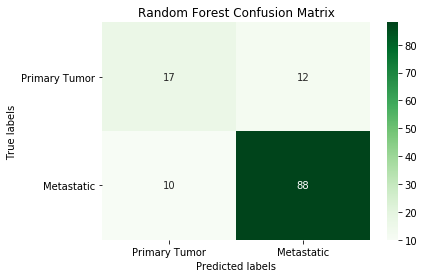

In [35]:
rf_model = grid_search_rf_pca.best_estimator_

rf_pred = grid_search_rf_pca.predict(test_df)

print('Random Forest accuracy:', round(accuracy_score(test_target.sample_type.astype('int'), rf_pred), 3))

cm_rf = confusion_matrix(test_target.sample_type.astype('int'), rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Greens') 
labels = ['Primary Tumor', 'Metastatic']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Confusion Matrix') 
ax.xaxis.set_ticklabels(labels) 
ax.yaxis.set_ticklabels(labels, rotation=360)

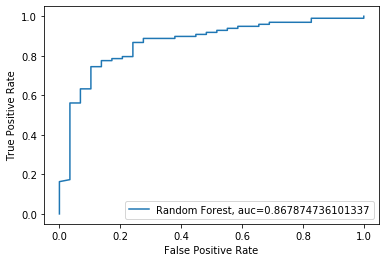

In [36]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
fpr, tpr, _ = roc_curve(test_target.sample_type.astype('int'),  rf_pred_proba)
auc = roc_auc_score(test_target.sample_type.astype('int'), rf_pred_proba)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc=4)
plt.show()

In [37]:
rf_model = grid_search_rf_pca.best_estimator_
rf_pred_proba = rf_model.predict_proba(test_df)[::,1]
log_loss_score = log_loss(test_target.sample_type.astype('int'),  rf_pred_proba)
print(log_loss_score)

0.3816690731635034


### Weights

In [38]:
lr_model = grid_search_feature_lr.best_estimator_
lr_weights_df = pd.DataFrame(lr_model[1].coef_[0])
lr_weights_df.index = train_df.columns
lr_weights_df.columns = ["weights"]
lr_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
lr_weights_df.head(20)

,weights
vital_status_Dead,0.217438
icd_10_code_C77.3,0.167757
icd_10_code_C77.9,0.064797
height,0.050580
icd_10_code_C77.4,0.027945
ajcc_pathologic_n_N1b,0.002768
icd_10_code_C49.9,0.000000
icd_10_code_C49.6,0.000000
icd_10_code_C49.5,0.000000
icd_10_code_C49.4,0.000000


In [39]:
svm_model = grid_search_feature_svm.best_estimator_
importances = np.dot(svm_model[1].support_,svm_model[1].support_vectors_)
svm_weights_df = pd.DataFrame(importances)
svm_weights_df.index = train_df.columns
svm_weights_df.columns = ["weights"]
svm_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
svm_weights_df.head(10)

,weights
ajcc_pathologic_t_T4b,7140.515180
icd_10_code_C44.6,6008.708097
icd_10_code_C44.9,5131.300091
icd_10_code_C44.5,4698.589452
age_at_index,3996.810950
icd_10_code_C49.5,3761.040968
ajcc_pathologic_stage_Stage IIC,3757.075974
icd_10_code_C44.7,2879.609084
ajcc_pathologic_stage_Stage IIA,2694.166097
ajcc_pathologic_m_M1b,2592.895666


In [40]:
rf_model = grid_search_feature_rf.best_estimator_
rf_weights_df = pd.DataFrame(rf_model[1].feature_importances_)
rf_weights_df.index = train_df.columns
rf_weights_df.columns = ["weights"]
rf_weights_df.sort_values(by=['weights'], inplace=True, ascending=False)
rf_weights_df.head(10)

,weights
ajcc_pathologic_t_T4b,0.339559
ajcc_pathologic_stage_Stage IIC,0.251167
icd_10_code_C44.9,0.073707
ajcc_pathologic_stage_Stage IIIC,0.061273
icd_10_code_C44.5,0.054156
bmi,0.037223
height,0.037081
age_at_index,0.030025
icd_10_code_C44.7,0.022353
vital_status_Dead,0.020804


In [ ]:
weights = lr_weights_df.merge(svm_weights_df,left_index=True, right_index=True)
weights = weights.merge(rf_weights_df,left_index=True, right_index=True)
weights.columns = ["Logistic Regression", "Support Vector Machines","Random Forest"]
weights.head(20)

In [ ]:
weights.to_csv('../data/Melanoma_Clinical_classifier_[WITHOUT PCA]_weights_all_data.csv')

In [ ]:
test_df.shape